## Why you need logistic regression

#### Exploring the explanatory variables
When the response variable is logical, all the points lie on the $y=0$
 and $y=1$
 lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

You will use these histograms to get to know the financial services churn dataset seen in the video.

churn is available as a pandas DataFrame

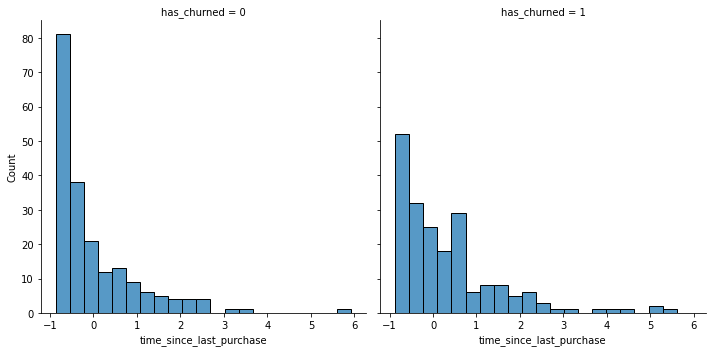

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

churn = pd.read_csv("churn.csv")

# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data = churn, x = "time_since_last_purchase",col = "has_churned", kind='hist')

plt.show()

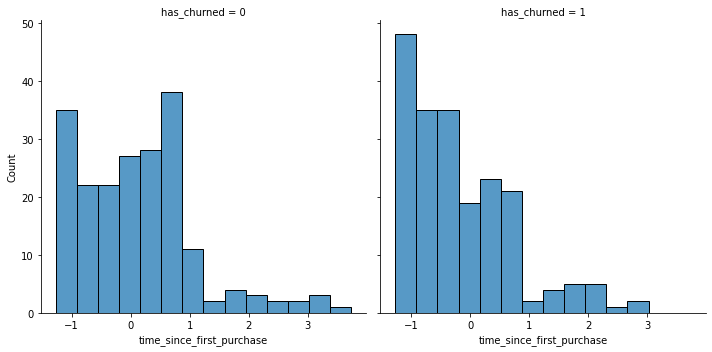

In [3]:
# Redraw the plot with time_since_first_purchase
sns.displot(data = churn, x = "time_since_first_purchase",col = "has_churned", kind='hist')

plt.show()

High five for the histograms! In the time_since_last_purchase plot, the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For time_since_first_purchase the opposite is true: churners have a shorter length of relationship.

#### Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

churn is available.

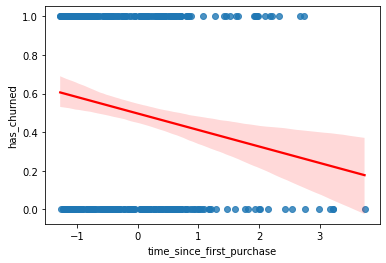

In [4]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x = "time_since_first_purchase", 
            y = "has_churned",
            data = churn,
            line_kws={"color": "red"})

plt.show()

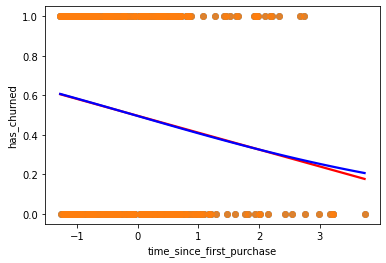

In [5]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "blue"},
            logistic = True)

plt.show()

Magnificent model comparison plotting! The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

#### Logistic regression with logit()
Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

churn is available.

In [6]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


Lovely logistic modeling! The code to run a logistic regression is a simple change from the code to run a linear regression. Now we can make some predictions with the model.

## Predictions and odds ratios
#### Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

Two variables are available:

mdl_churn_vs_relationship is the fitted logistic regression model of has_churned versus time_since_first_purchase.
explanatory_data is a DataFrame of explanatory values.

In [7]:
import numpy as np

explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-1.5, 4.0, 0.25)})

# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned
0                      -1.50     0.626448
1                      -1.25     0.605470
2                      -1.00     0.584096
3                      -0.75     0.562401
4                      -0.50     0.540465


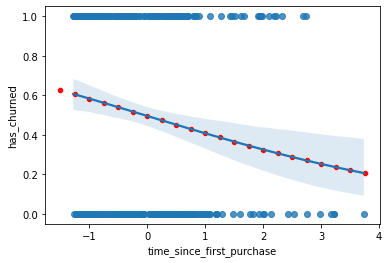

In [8]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x = "time_since_first_purchase",
            y = "has_churned",
            data = churn,
            logistic = True)

# Overlay with prediction_data, colored red
sns.scatterplot(x = "time_since_first_purchase",
                y = "has_churned",                
                data = prediction_data,                
                color = "red")

plt.show()

Probably perfect probability plotting! The probability of a positive response is a natural way of thinking about predictions.

#### Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

In [9]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


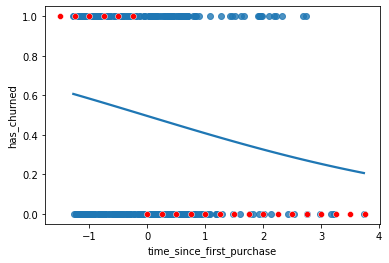

In [10]:
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x = "time_since_first_purchase",
                y = "most_likely_outcome",
                data = prediction_data,
                color = "red")

plt.show()

The most likely outcome is that you will master logistic regression! Providing the most likely response is a great way to share the model results with a non-technical audience.

#### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

In [11]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


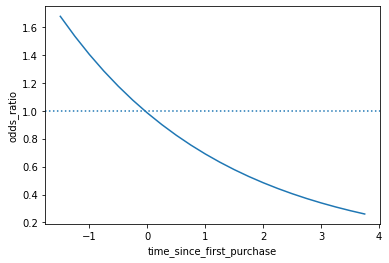

In [12]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = "time_since_first_purchase",
             y = "odds_ratio",
             data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

You beat the odds! Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses.

#### Log odds ratio
One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

mdl_churn_vs_relationship, explanatory_data, and prediction_data are available from the previous exercise.

In [13]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.50     0.626448                  1.0    1.677003   
1                      -1.25     0.605470                  1.0    1.534661   
2                      -1.00     0.584096                  1.0    1.404400   
3                      -0.75     0.562401                  1.0    1.285197   
4                      -0.50     0.540465                  1.0    1.176111   

   log_odds_ratio  
0        0.517008  
1        0.428309  
2        0.339610  
3        0.250912  
4        0.162213  


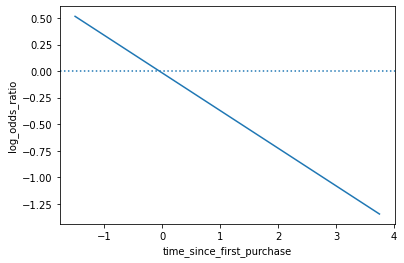

In [14]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

Laudable log odds ratio work! The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.

#### Calculating the confusion matrix
A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

True positive: The customer churned and the model predicted they would.
False positive: The customer didn't churn, but the model predicted they would.
True negative: The customer didn't churn and the model predicted they wouldn't.
False negative: The customer churned, but the model predicted they wouldn't.
churn and mdl_churn_vs_relationship are available.

In [15]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,
                         "predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(expand = False))


AttributeError: 'DataFrame' object has no attribute 'value_counts'

[[112.  88.]
 [ 76. 124.]]


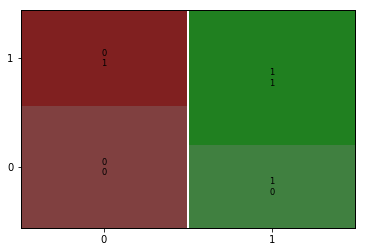

In [16]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

Magnificent mosaic plotting! By using the .pred_table() method, getting and plotting the confusion matrix is easy.

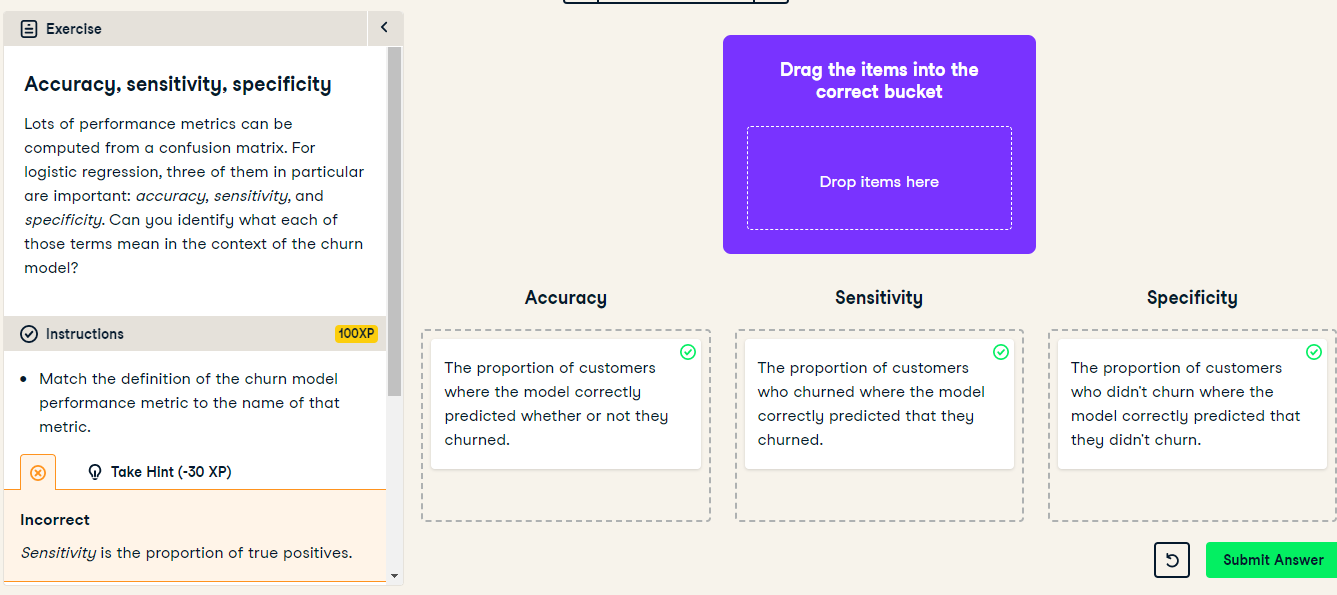

Insightful metric identification! Accuracy, sensitivity, and specificity are the most important performance metrics for logistic regression models. In the last exercise, you'll learn how to calculate them.

In [18]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


Magnificent model performance measuring! Using these metrics, it becomes much easier to interpret and compare logistic regression models.

Congratulations on finishing the course! You’re now able to perform linear and logistic regression analysis in Python!
Tweet us your feedback and tell us what you think.